In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv("../data/HI-CC_data.tsv", sep="\t")

In [ ]:
data["HI_label"] = data["HI"].map({"yes": 1, "no": 0})

In [12]:
data["topic_distribution"] = data["topic_distr"].apply(lambda x: np.array(np.matrix(x)).ravel())

In [14]:
# defining the dependent and independent variables 
Xtrain = data['topic_distribution'].tolist()
ytrain = data['HI_label'].tolist()
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.353627
         Iterations 8


In [15]:
# printing the summary table 
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10300
Model:                          Logit   Df Residuals:                    10176
Method:                           MLE   Df Model:                          123
Date:                Thu, 15 Aug 2024   Pseudo R-squ.:                  0.2952
Time:                        23:14:59   Log-Likelihood:                -3642.4
converged:                       True   LL-Null:                       -5168.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -17.2203      3.381     -5.093      0.000     -23.847     -10.594
x2            -2.4900      3.687     -0.675      0.499      -9.716       4.736
x3            -1.0458      1.381     -0.757      0.4

In [16]:
# Get topic names
labels = ["unk"]*data.shape[0]
for i in data["topic_name"].tolist():
    nn = int(i.split("_")[0])
    name = "_".join(i.split("_")[1:])
    labels[nn]=name

In [17]:
# get IDs of topics by smallest|largest coefficients
lows = log_reg.params.argsort()[:10][::-1]
tops = log_reg.params.argsort()[-10:][::-1]

In [18]:
# most predictive for HI (Y=1)
[(log_reg.params[i], labels[i]) for i in tops]

[(38.39705108379555, 'iran_water_the_in'),
 (26.319552940590597, 'her_she_novel_book'),
 (19.547242953419442, 'our_we_climate_is'),
 (17.310588297018445, 'students_school_education_teachers'),
 (16.675274822435387, 'heat_temperatures_degrees_texas'),
 (16.043296919013123, 'coastal_homes_flood_the'),
 (15.605042169429703, 'countries_africa_world_climate'),
 (13.605838339459103, 'ladakh_nuns_buddha_buddhist'),
 (11.1360292656069, 'we_our_of_it'),
 (10.572322887588113, 'lake_water_river_salt')]

In [30]:
[" ".join(labels[i].split("_"))  for i in tops]

['iran water the in',
 'her she novel book',
 'our we climate is',
 'students school education teachers',
 'heat temperatures degrees texas',
 'coastal homes flood the',
 'countries africa world climate',
 'ladakh nuns buddha buddhist',
 'we our of it',
 'lake water river salt']

In [19]:
# most predictive for NOT HI (Y=0)
[(log_reg.params[i], labels[i]) for i in lows]

[(-14.199612425674937, 'record_temperatures_heat_temperature'),
 (-14.93510171605585, 'eu_cbam_trade_wto'),
 (-14.979037786628561, 'esg_companies_funds_investors'),
 (-15.33643405909767, 'education_students_university_research'),
 (-16.430750762621678, 'climate_change_environment_and'),
 (-16.995895439412774, 'gas_greens_projects_santos'),
 (-17.220272542796707, 'labour_sunak_uk_zero'),
 (-19.796043116625995, 'india_modi_g20_summit'),
 (-25.780100261260458, 'finance_bank_g20_india'),
 (-27.759623565983738, 'population_productivity_tax_our')]

In [29]:
[" ".join(labels[i].split("_")) for i in lows]

['record temperatures heat temperature',
 'eu cbam trade wto',
 'esg companies funds investors',
 'education students university research',
 'climate change environment and',
 'gas greens projects santos',
 'labour sunak uk zero',
 'india modi g20 summit',
 'finance bank g20 india',
 'population productivity tax our']

In [37]:
newly_plot_labels = ["1. Water in Iran", "2. Female author literature", "3. Our Climate", "4. Education system", 
                     "5. Extreme temperatures", "6. Coastal flooding risk", 
                     "7. Global climate", "8. Buddhist community", "9. Personal pronouns", 
                     "10. US lakes and tribes", "1. Record temperatures", 
                     "2. EU carbon trading", "3. ESG investment", 
                     "4. Education and research", "5. Climate change in India", "6. Australian green energy", 
                     "7. UK energy policy", "8. India's G20 Summit", "9. G20 finance in India", "10. Economic growth"]


Estimated coefficients in a logistic regression  Most important features (topics) for predicting HI articles (positive/right) vs non-HI articles (negative/left) with a logistic regression model


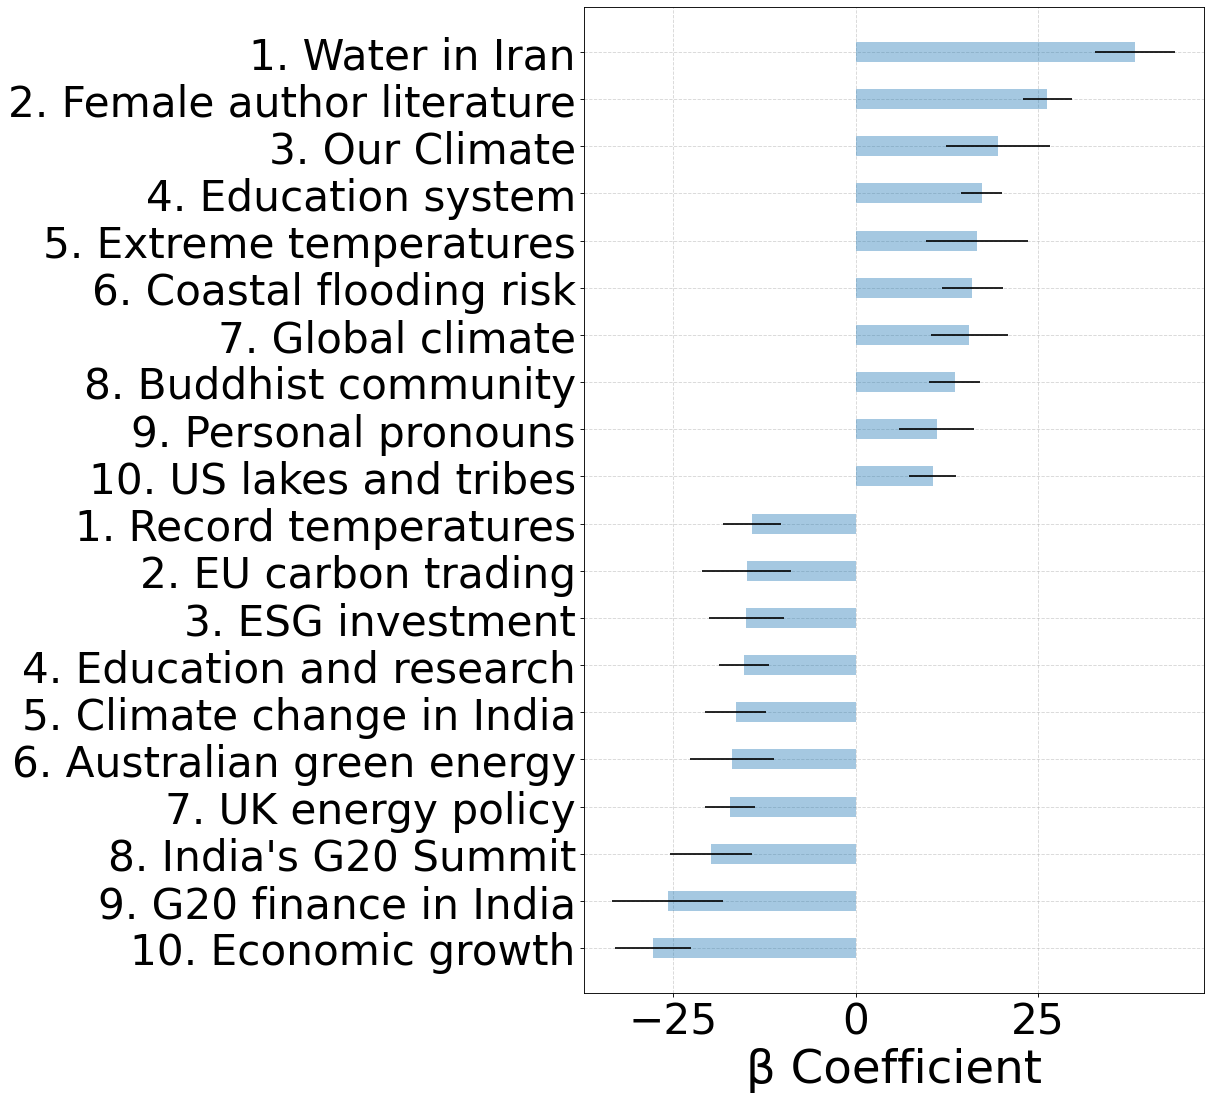

In [38]:
# plot inputs

plot_labels = [labels[i] for i in tops] + [labels[i] for i in lows]
plot_values = [log_reg.params[i] for i in tops] + [log_reg.params[i] for i in lows]
y_locs = list(range(20))[::-1]
errors = [log_reg.bse[i] for i in tops] + [log_reg.bse[i] for i in lows]

# Draw plot 
plt.figure(figsize=(10, 16), dpi=80) 
  
    
# plot the blue bars
plt.hlines(y=y_locs, xmin=0, xmax=plot_values, 
           alpha=0.4, linewidth=18) 

# add error bars (std err in model output)
for i in range(len(errors)):
    plt.hlines(y_locs[i], plot_values[i]-errors[i], plot_values[i]+errors[i],color="black")

# Decorations 
# plt.gca().set(ylabel='Topic', xlabel='Coefficient') 
  
# Show topics as y-labels
# plt.yticks(y_locs, plot_labels, fontdict={ 
plt.yticks(y_locs, newly_plot_labels, fontdict={ 
          'size': 38})

# Title of Bar Chart 
# plt.title('Most important features (topics) for predicting HI articles (positive/right) \nvs non-HI articles (negative/left) with a logistic regression model', fontdict={ 
#           'size': 20}) 
  
# Optional grid layout 
plt.grid(linestyle='--', alpha=0.5) 
plt.xlabel("β Coefficient", fontdict={ 
          'size': 42})
plt.tick_params(axis='x', labelsize=38)
plt.savefig("../docs/lr_newlabels.pdf",bbox_inches='tight')
plt.rcParams["font.serif"] = ["Times New Roman"]

print('Estimated coefficients in a logistic regression  Most important features (topics) for predicting HI articles (positive/right) vs non-HI articles (negative/left) with a logistic regression model')
plt.show() 
